<a href="https://colab.research.google.com/github/arkistar4uu/Python_Projects/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

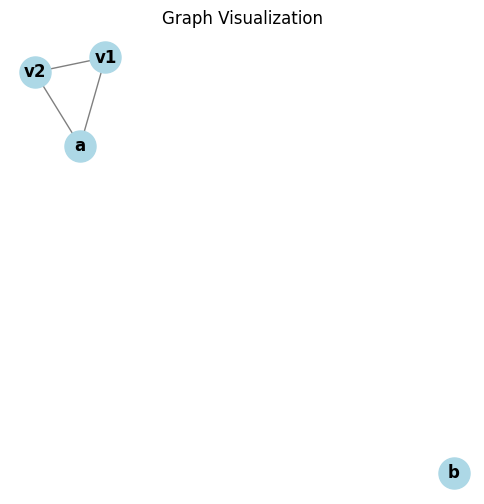

Dendrogram:
{'a', 'v2', 'v1'}
{'b'}


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()
G.add_edges_from([('a', 'v1'), ('a', 'v2'), ('v1', 'v2'), ('v2', 'b')])

# Apply Girvan and Newman's algorithm
def girvan_newman(graph):
    components = [c for c in nx.connected_components(graph)]
    while len(components) == 1:
        betweenness = nx.edge_betweenness_centrality(graph)
        max_edge = max(betweenness, key=betweenness.get)
        graph.remove_edge(*max_edge)
        components = [c for c in nx.connected_components(graph)]
    return components

# Get the dendrogram
dendrogram = girvan_newman(G)

# Visualize the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(6, 6))
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black', font_weight='bold')
plt.axis('off')
plt.title("Graph Visualization")
plt.show()

# Print the dendrogram
print("Dendrogram:")
for level in dendrogram:
    print(level)
